# 🛍️  E-Commerce Sales Exploratory Data Analysis 

This notebook explores a retail dataset containing daily sales records across different product categories, customer segments, and marketing efforts. The goal is to uncover patterns, trends, and actionable insights to improve business decisions.

## 📑 Data Dictionary

-   **Date**:	The date of the sale (01-01-2023 onward).
-   **Product_Category**:	Category of the product (e.g., Electronics, Sports, Other).
-   **Price**:	Price of the product (numerical).
-   **Discount**:	Discount applied to the product (numerical).
-   **Customer_Segment**:	Buyer segment (e.g., Regular, Occasional, Other).
-   **Marketing_Spend**:	Marketing budget allocated for sales (numerical).
-   **Units_Sold**:	Number of units sold per transaction (numerical).


## ❓ Key Analytical Questions

1. How do monthly sales trend over time?
2. What's prices' distribution per category? 
3. Which product category generates the most revenue and profit?
4. Does a higher discount lead to more units sold?
5. What is the relationship between marketing spend and sales?
6. Do customer segments behave differently?


## ⚙️ Import necessary libs
-   *numpy* for Pandas
-   *pandas* for Date frames
-   *matplotlib* for Static plots
-   *seaborn* for Statistics plots

Checking data's columns amd description

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_csv(r"C:\Users\medoa\Desktop\E-commerce Sales Analysis Dataset\Ecommerce_Sales_Prediction_Dataset.csv")
df

,Date,Product_Category,Price,Discount,Customer_Segment,Marketing_Spend,Units_Sold
0,01-01-2023,Sports,932.80,35.82,Occasional,6780.38,32
1,02-01-2023,Toys,569.48,3.60,Premium,6807.56,16
2,03-01-2023,Home Decor,699.68,3.56,Premium,3793.91,27
3,04-01-2023,Toys,923.27,0.61,Premium,9422.75,29
4,05-01-2023,Toys,710.17,47.83,Premium,1756.83,17
...,...,...,...,...,...,...,...
995,22-09-2025,Fashion,740.06,49.06,Regular,1890.83,34
996,23-09-2025,Electronics,517.10,28.48,Premium,8011.66,21
997,24-09-2025,Electronics,683.43,12.98,Occasional,3408.51,19
998,25-09-2025,Sports,51.26,21.85,Occasional,7335.62,26


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              1000 non-null   object 
 1   Product_Category  1000 non-null   object 
 2   Price             1000 non-null   float64
 3   Discount          1000 non-null   float64
 4   Customer_Segment  1000 non-null   object 
 5   Marketing_Spend   1000 non-null   float64
 6   Units_Sold        1000 non-null   int64  
dtypes: float64(3), int64(1), object(3)
memory usage: 54.8+ KB


In [10]:
df.describe()

,Price,Discount,Marketing_Spend,Units_Sold
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,505.241920,24.919750,4912.830240,29.631000
std,289.791248,14.439951,2840.602656,7.267989
min,14.590000,0.010000,100.300000,5.000000
25%,243.342500,12.995000,2413.020000,24.000000
50%,509.310000,24.965000,4837.245000,30.000000
75%,747.592500,37.562500,7319.675000,34.000000
max,999.420000,49.920000,9995.620000,57.000000


## 🧹 Data Cleaning

- Converted the `Date` column to datetime format.
- Checked for missing values – none found.
- checked category values ─ [`Customer_Segment`,    `Product_Category `]
- Verified data types of each column.
- Calculated `Revenue` = (`Price` - `Discount`) * `Units_Sold`
- Calculated `Profit` = (`Revenue` - `Marketing_Spend`) 
- Define `Day_name`& `Month_Start`  columns


In [3]:
df["Date"] = pd.to_datetime(df["Date"], format="%d-%m-%Y")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              1000 non-null   datetime64[ns]
 1   Product_Category  1000 non-null   object        
 2   Price             1000 non-null   float64       
 3   Discount          1000 non-null   float64       
 4   Customer_Segment  1000 non-null   object        
 5   Marketing_Spend   1000 non-null   float64       
 6   Units_Sold        1000 non-null   int64         
dtypes: datetime64[ns](1), float64(3), int64(1), object(2)
memory usage: 54.8+ KB


In [16]:
# See catogary values

catColumns = ["Customer_Segment","Product_Category"]

for cat in catColumns:
    print(df[cat].value_counts())
    print("="*50)

Customer_Segment
Regular       345
Occasional    339
Premium       316
Name: count, dtype: int64
Product_Category
Electronics    210
Sports         206
Toys           204
Home Decor     190
Fashion        190
Name: count, dtype: int64


In [4]:
df["Revenue"] = (df["Price"] - df["Discount"]) * df["Units_Sold"]
df["Profit"] = df["Revenue"] - df["Marketing_Spend"]
df["Day_Name"] = df["Date"].dt.day_name()
df['Month_Start'] = df['Date'].values.astype('datetime64[M]')
df['Month_Year'] = df['Date'].dt.strftime('%B %Y')


df.head()

,Date,Product_Category,Price,Discount,Customer_Segment,Marketing_Spend,Units_Sold,Revenue,Profit,Day_Name,Month_Start,Month_Year
0,2023-01-01,Sports,932.80,35.82,Occasional,6780.38,32,28703.36,21922.98,Sunday,2023-01-01,January 2023
1,2023-01-02,Toys,569.48,3.60,Premium,6807.56,16,9054.08,2246.52,Monday,2023-01-01,January 2023
2,2023-01-03,Home Decor,699.68,3.56,Premium,3793.91,27,18795.24,15001.33,Tuesday,2023-01-01,January 2023
3,2023-01-04,Toys,923.27,0.61,Premium,9422.75,29,26757.14,17334.39,Wednesday,2023-01-01,January 2023
4,2023-01-05,Toys,710.17,47.83,Premium,1756.83,17,11259.78,9502.95,Thursday,2023-01-01,January 2023


## 📈 EDA
Trying to find answers in graphical relationships

###  Sales Over Time

We plotted total units sold by date to observe trends.

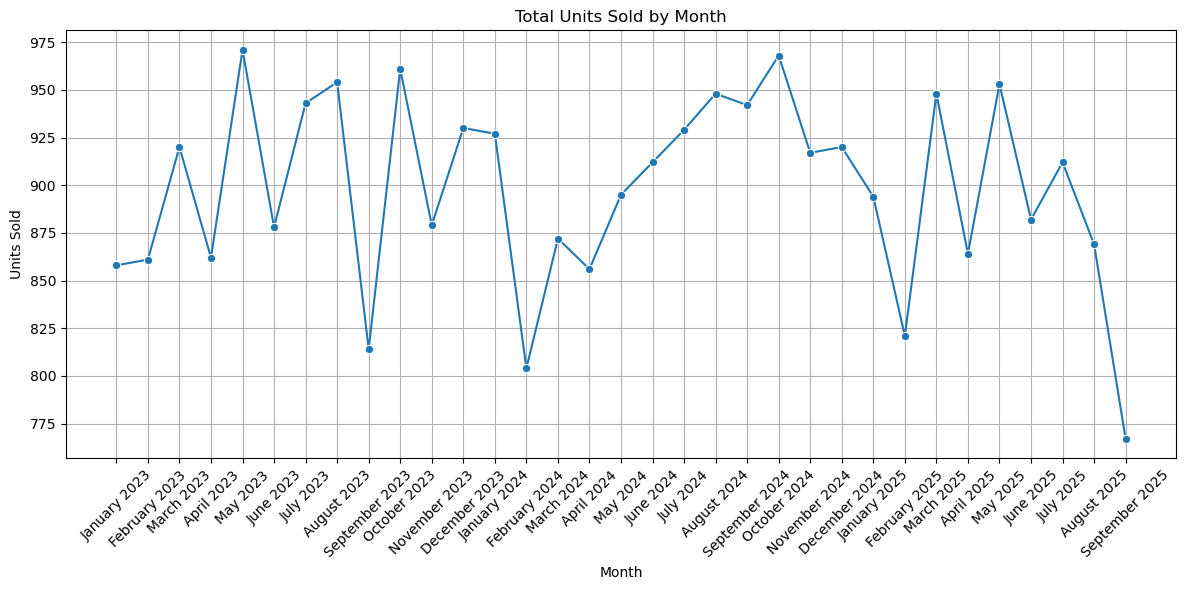

In [23]:
salesSUM = df.groupby("Month_Start")["Units_Sold"].sum().reset_index()
salesSUM['Month_Year'] = salesSUM['Month_Start'].dt.strftime('%B %Y')
# print(salesSUM)
plt.figure(figsize=(12,6))
sns.lineplot(data=salesSUM,x="Month_Year", y="Units_Sold", marker='o')
plt.title("Total Units Sold by Month")
plt.xlabel("Month")
plt.ylabel("Units Sold")
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

- There isn't pattern in Unite sold, the best month for sales was *May 2023* with 970+ Units Sold

### Prices distribution  
by boxplot prices' category

In [6]:
df.head()

,Date,Product_Category,Price,Discount,Customer_Segment,Marketing_Spend,Units_Sold,Revenue,Profit,Day_Name,Month_Start,Month_Year
0,2023-01-01,Sports,932.80,35.82,Occasional,6780.38,32,28703.36,21922.98,Sunday,2023-01-01,January 2023
1,2023-01-02,Toys,569.48,3.60,Premium,6807.56,16,9054.08,2246.52,Monday,2023-01-01,January 2023
2,2023-01-03,Home Decor,699.68,3.56,Premium,3793.91,27,18795.24,15001.33,Tuesday,2023-01-01,January 2023
3,2023-01-04,Toys,923.27,0.61,Premium,9422.75,29,26757.14,17334.39,Wednesday,2023-01-01,January 2023
4,2023-01-05,Toys,710.17,47.83,Premium,1756.83,17,11259.78,9502.95,Thursday,2023-01-01,January 2023


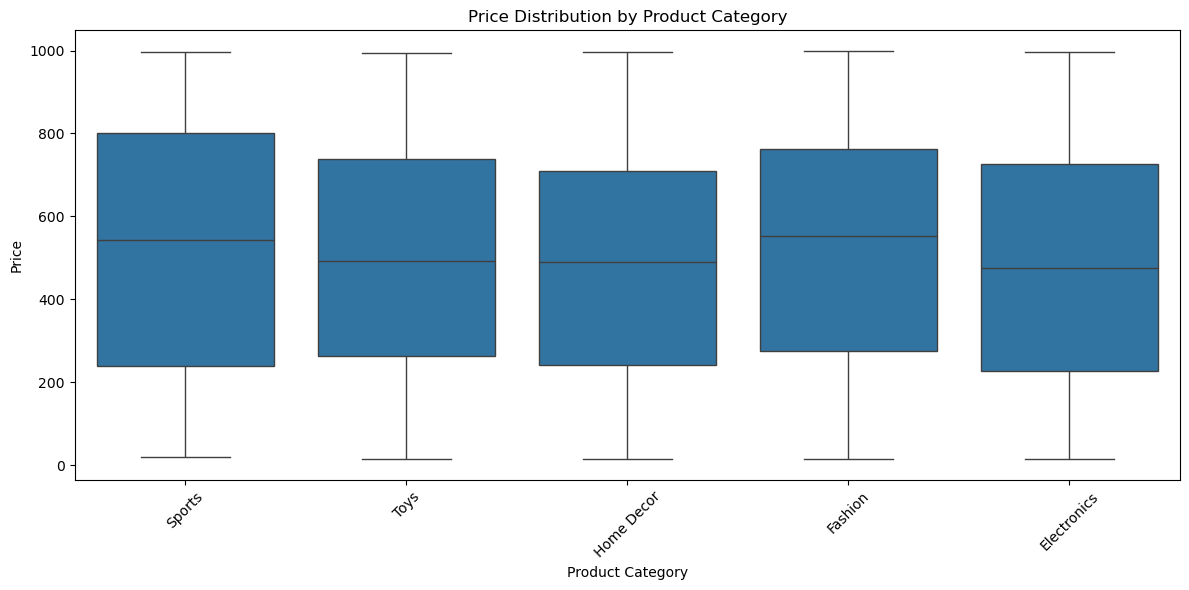

In [18]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x="Product_Category", y="Price")
plt.title("Price Distribution by Product Category")
plt.xlabel("Product Category")  
plt.ylabel("Price")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- Prices are generally close.

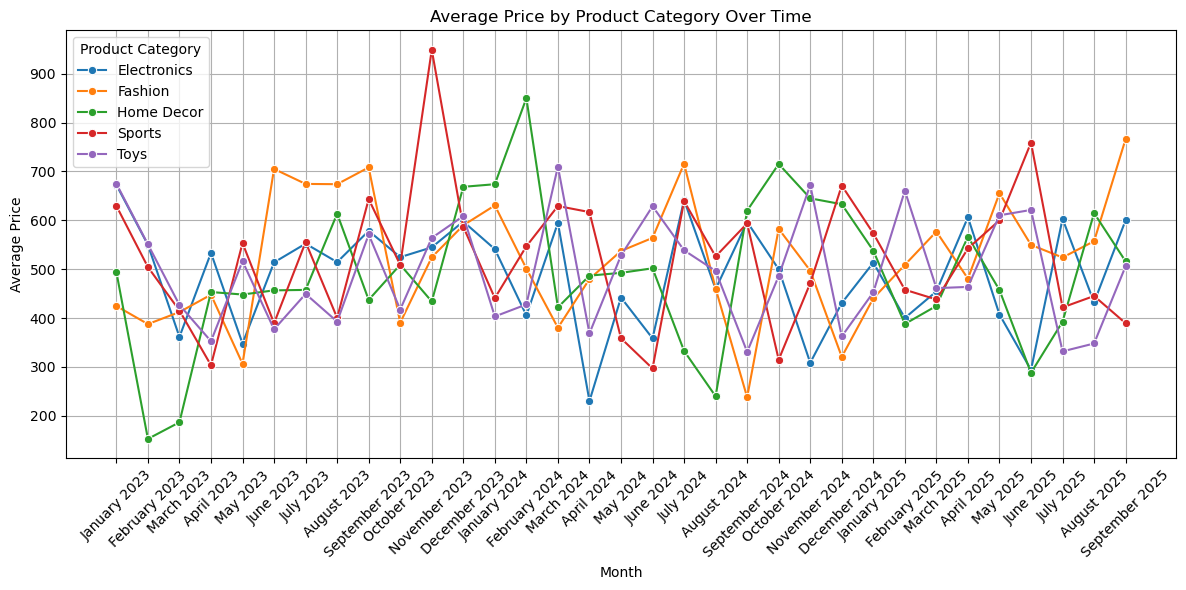

In [ ]:
pricesPerTime = df.groupby(["Month_Start","Product_Category"])["Price"].mean().reset_index()
pricesPerTime["Month_Year"] = pricesPerTime["Month_Start"].dt.strftime('%B %Y')


plt.figure(figsize=(12,6))
sns.lineplot(data=pricesPerTime, x="Month_Year", y="Price", hue="Product_Category", marker='o')
plt.title("Average Price by Product Category Over Time")
plt.xlabel("Month")
plt.ylabel("Average Price")
plt.xticks(rotation=45)
plt.legend(title="Product Category")
plt.grid()
plt.tight_layout()
plt.show()

- There are no patterns in prices, but in the early months of the year we suffer from low prices.

### Best product are making Revenue

In [14]:
prodsCat

,Product_Category,Revenue,Profit
0,Electronics,2866100.57,1801747.02
1,Fashion,2818970.56,1898015.77
2,Home Decor,2657428.98,1718702.86
3,Sports,3053069.60,2074821.59
4,Toys,2871924.54,1861376.77


In [13]:
prodsCat_melted

,Product_Category,Metric,Amount
0,Electronics,Revenue,2866100.57
1,Fashion,Revenue,2818970.56
2,Home Decor,Revenue,2657428.98
3,Sports,Revenue,3053069.60
4,Toys,Revenue,2871924.54
5,Electronics,Profit,1801747.02
6,Fashion,Profit,1898015.77
7,Home Decor,Profit,1718702.86
8,Sports,Profit,2074821.59
9,Toys,Profit,1861376.77


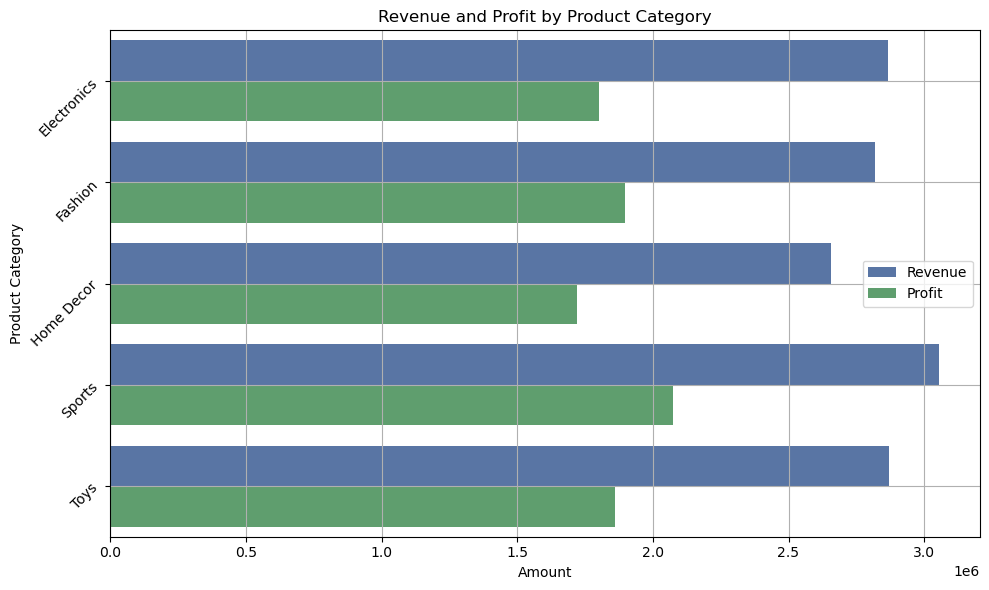

In [ ]:
prodsCat = df.groupby("Product_Category")[["Revenue","Profit"]].sum().reset_index()

# Horizontal grouped bar plot with seaborn
prodsCat_melted = prodsCat.melt(id_vars="Product_Category", value_vars=["Revenue", "Profit"],
                                var_name="Metric", value_name="Amount")
plt.figure(figsize=(10,6))
sns.barplot(
    data=prodsCat_melted,
    y="Product_Category",
    x="Amount",
    hue="Metric",
    palette=["#4c72b0", "#55a868"],
    orient="h"
)
plt.title("Revenue and Profit by Product Category")
plt.xlabel("Amount")
plt.ylabel("Product Category")
plt.yticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.grid()
plt.show()

Most product making Revenue:
1. Sports
2. Toys
3. Electronics 
4. Fashion
5. Home Decor

but most product making profit:
1. Sports
2. Fashion
3. Toys
4. Electronics
5. Home Decor

- #️⃣1 Sports' product are the Best
- Almost the fashion is't the second product make *Revenue* but is Second *profit*


### higher discount & units sold

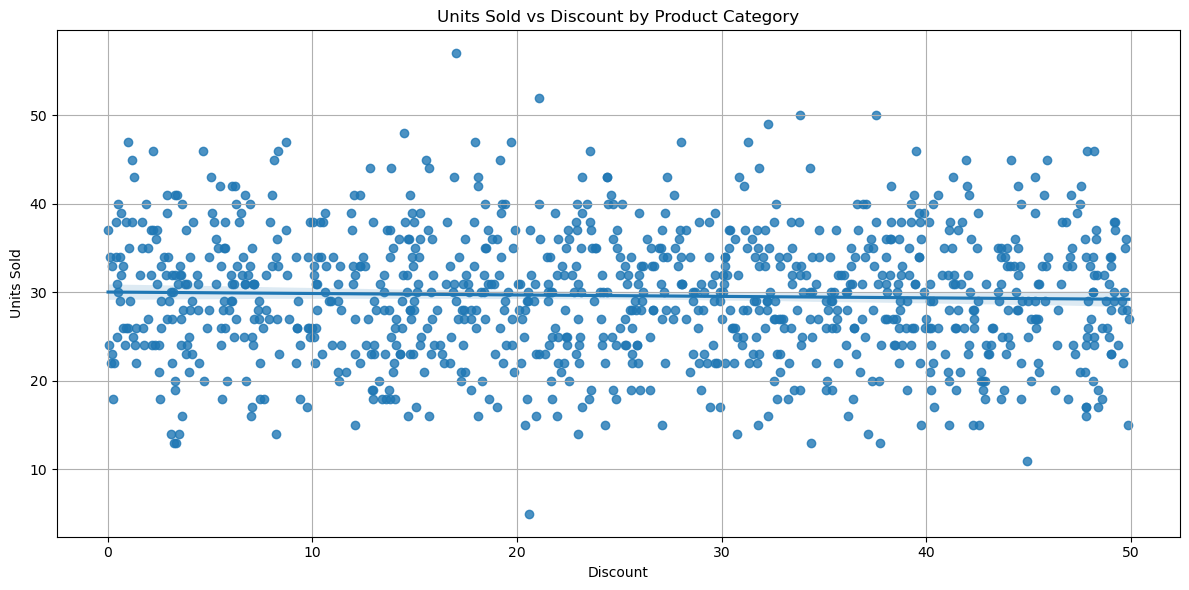

In [32]:
plt.figure(figsize=(12,6))
sns.regplot(data=df, x="Discount", y="Units_Sold")
plt.title("Units Sold vs Discount by Product Category")
plt.xlabel("Discount")
plt.ylabel("Units Sold")
plt.grid()
plt.tight_layout()
plt.show()

- No, the discounts do not affect sales, it's useless

### Total Marketing spend & Sales

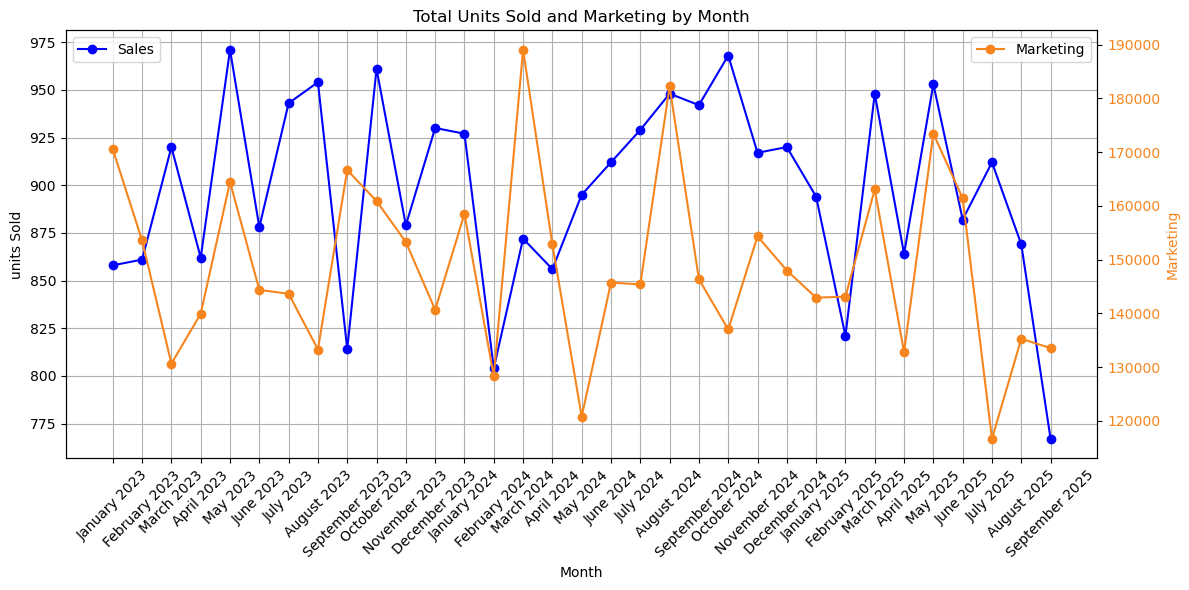

In [39]:
SalesSpendSUM = df.groupby("Month_Start")[["Units_Sold","Marketing_Spend"]].sum().reset_index()
SalesSpendSUM['Month_Year'] = SalesSpendSUM['Month_Start'].dt.strftime('%B %Y')
fig, axes = plt.subplots(figsize=(12,6))
axes.plot(SalesSpendSUM["Month_Year"],SalesSpendSUM["Units_Sold"],marker='o',label="Sales",color="blue")
axes2 = axes.twinx()
axes2.plot(SalesSpendSUM["Month_Year"],SalesSpendSUM["Marketing_Spend"],marker="o",label="Marketing",color="#f6851e")
axes.set_title("Total Units Sold and Marketing by Month")
axes.set_xlabel("Month")
axes.set_ylabel("units Sold")
axes2.set_ylabel("Marketing",color="#f6851e")
axes2.tick_params(axis='y', labelcolor='#f6851e')
axes.tick_params(axis='x', rotation=45)
axes.legend(loc="upper left")
axes2.legend(loc="upper right")
axes.grid()
plt.tight_layout()
plt.show()


-   Sales doesn't depend on Marketing.

### customer segments

In [33]:
df.head()

,Date,Product_Category,Price,Discount,Customer_Segment,Marketing_Spend,Units_Sold,Revenue,Profit,Day_Name,Month_Start,Month_Year
0,2023-01-01,Sports,932.80,35.82,Occasional,6780.38,32,28703.36,21922.98,Sunday,2023-01-01,January 2023
1,2023-01-02,Toys,569.48,3.60,Premium,6807.56,16,9054.08,2246.52,Monday,2023-01-01,January 2023
2,2023-01-03,Home Decor,699.68,3.56,Premium,3793.91,27,18795.24,15001.33,Tuesday,2023-01-01,January 2023
3,2023-01-04,Toys,923.27,0.61,Premium,9422.75,29,26757.14,17334.39,Wednesday,2023-01-01,January 2023
4,2023-01-05,Toys,710.17,47.83,Premium,1756.83,17,11259.78,9502.95,Thursday,2023-01-01,January 2023


C:\Users\medoa\AppData\Local\Temp\ipykernel_9020\1622956091.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x="Customer_Segment", y="Units_Sold", estimator=sum, ci=None,width=.5,ax=ax[1])


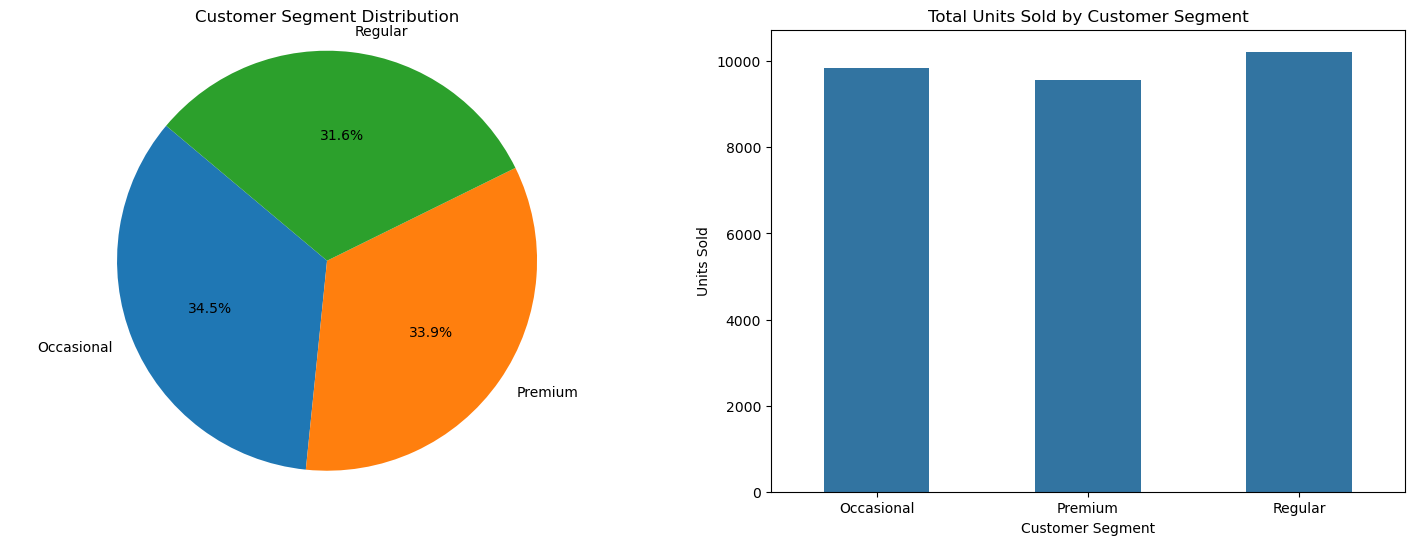

<Figure size 1200x600 with 0 Axes>

In [47]:
fig, ax = plt.subplots(1,2,figsize=(18,6))
plt.figure(figsize=(12,6))
ax[0].pie(df["Customer_Segment"].value_counts(), labels=df["Customer_Segment"].unique(), autopct='%1.1f%%', startangle=140)
ax[0].set_title("Customer Segment Distribution")
ax[0].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
sns.barplot(data=df, x="Customer_Segment", y="Units_Sold", estimator=sum, ci=None,width=.5,ax=ax[1])
ax[1].set_title("Total Units Sold by Customer Segment")
ax[1].set_xlabel("Customer Segment")
ax[1].set_ylabel("Units Sold")
plt.tight_layout()
plt.show()

- Although regular customers were the least likely to transact, the largest quantities sold were to them.

## ✅ Conclusion

Our sales do not exhibit recurring, constantly changing patterns. Our highest sales were in May 2023, with over 970 items sold.


Our product prices are similar; no category is noticeably more expensive than another.

Sports products are our best-selling and most profitable.

Discounts and promotions do not significantly impact sales.

Customer categories are similar in number, yet the regular category has the highest consumption rate.